<a href="https://colab.research.google.com/github/btlgs2000/dl_intro/blob/master/keras_novembre_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/btlgs2000/dl_intro

Cloning into 'dl_intro'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 219 (delta 119), reused 51 (delta 20), pack-reused 0
Receiving objects: 100% (219/219), 4.71 MiB | 24.85 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [21]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

In [ ]:
keras.datasets.fashion_mnist

In [ ]:
# preprazione del dataset

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
x_train = x_train / 255
x_test = x_test / 255

y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [ ]:
# creazione del modello

In [6]:
# [784, 100, 100, 10]

mlp = Sequential(
    [
        # (batch_num, 28, 28) => (batch_num, 784)
        Flatten(),
        Dense(100, activation='sigmoid'),# hidden
        Dense(100, activation='sigmoid'),# hidden
        Dense(10, 'softmax')
    ]
)

In [8]:
# compilazione

mlp.compile(optimizer=SGD(learning_rate=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
mlp.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2119 - accuracy: 0.3343
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7687 - accuracy: 0.6219
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1004 - accuracy: 0.7530
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7648 - accuracy: 0.8163
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6073 - accuracy: 0.8464
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5196 - accuracy: 0.8644
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4644 - accuracy: 0.8763
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4269 - accuracy: 0.8848
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3996 - accuracy: 0.8909
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.378

In [12]:
mlp.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8998


[0.3583133816719055, 0.8998000025749207]

In [14]:
from dl_intro.utils import display_samples, take_test_samples_idxs

In [20]:
y_probs = mlp.predict(x_test)

In [22]:
y_probs.shape

(10000, 10)

In [23]:
y_hat = np.argmax(y_probs, axis=1)

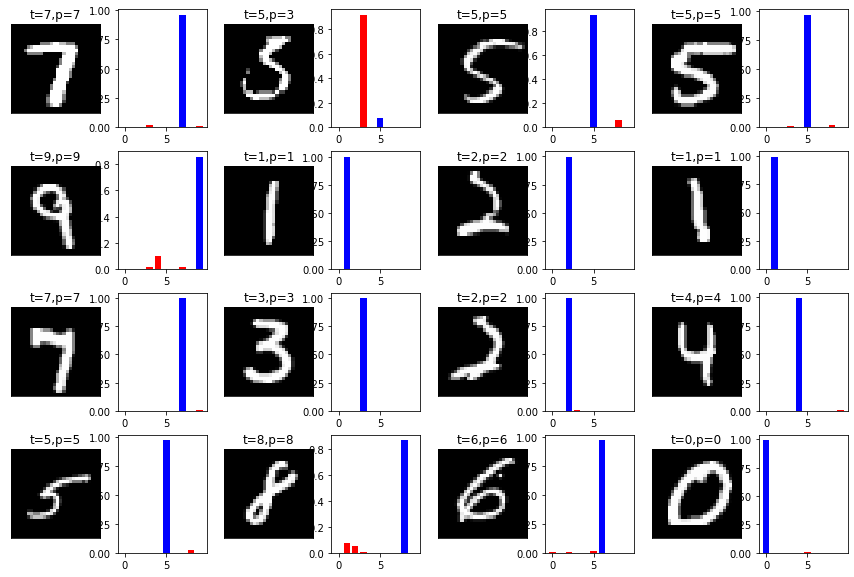

In [25]:
display_samples(x_test, y_test, y_hat, y_probs)

In [26]:
idxs =  take_test_samples_idxs(y_probs, y_test, is_correct=False, most_confident=True, k=100)

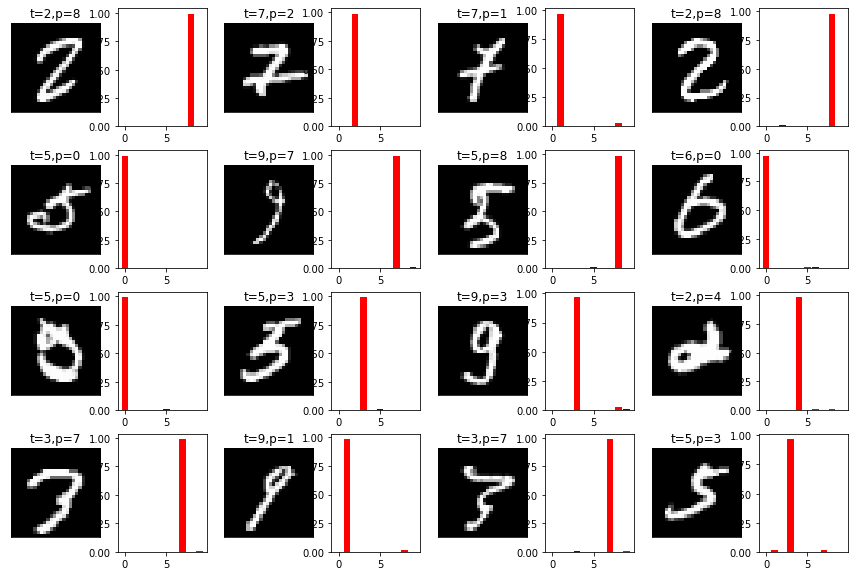

In [28]:
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_probs[idxs])